In [8]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import seaborn as sb
np.random.seed(7)

In [9]:
%matplotlib inline

In [10]:
import tensorflow as tf
print(tf.__version__)
from keras import backend
print(backend._BACKEND)

1.3.0
theano


In [4]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input and output variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [17]:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1) 

df = pd.DataFrame(dataset, columns = ["npreg","gluc","dbp","tsft","insulin","bmi","pedigree","age", "diabetes"] )

In [18]:
df[:10]

,npreg,gluc,dbp,tsft,insulin,bmi,pedigree,age,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0


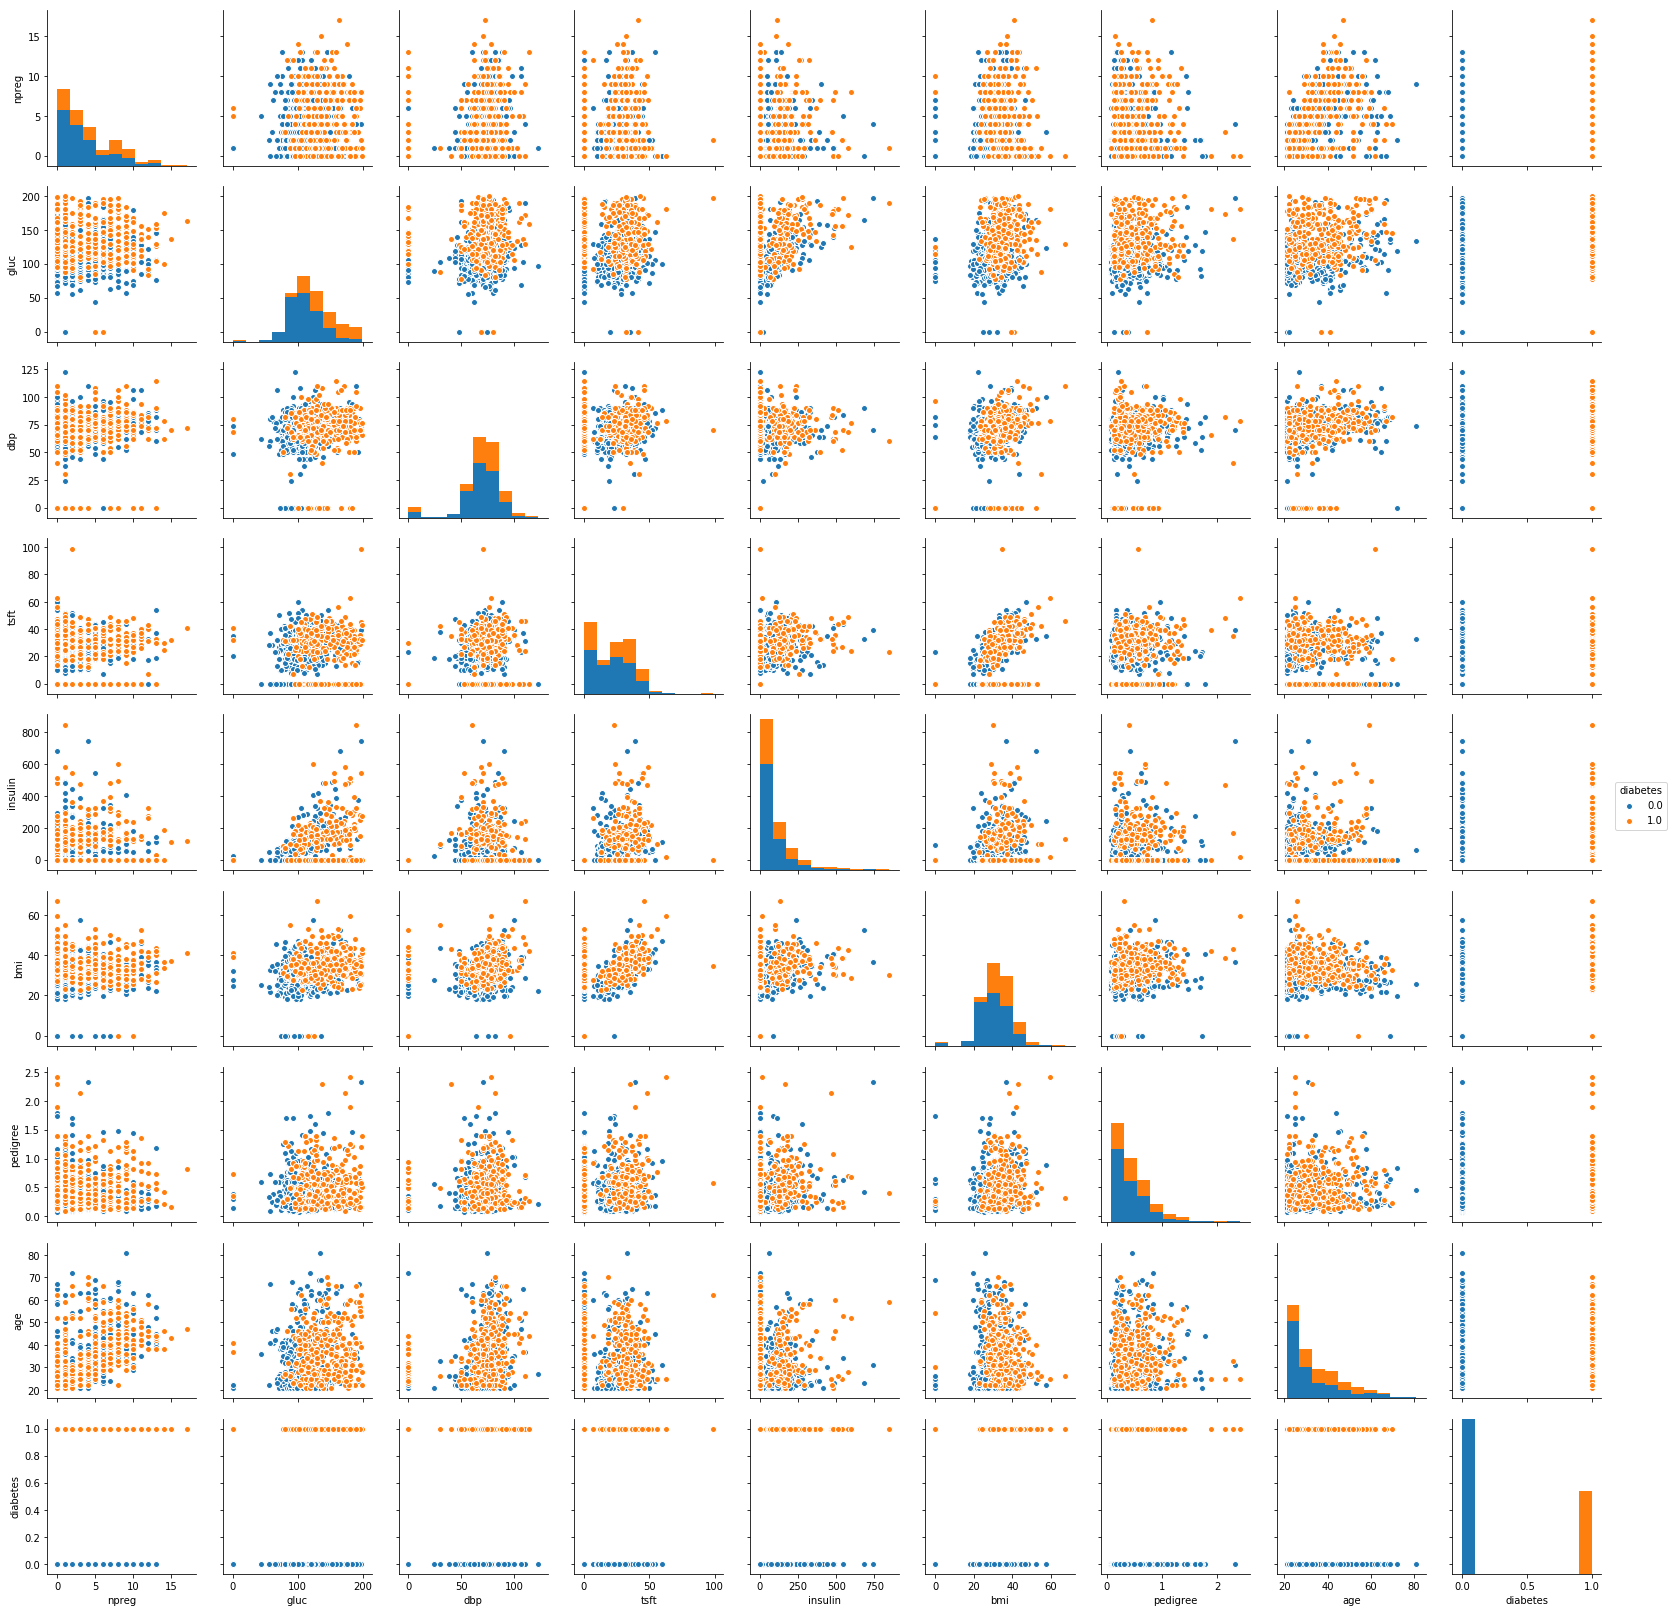

In [20]:
sb.pairplot(df,hue="diabetes")

In [11]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s - loss: 1.0972 - acc: 0.5872     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.7484 - acc: 0.6159     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.6884 - acc: 0.6107     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.6697 - acc: 0.6406     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6397 - acc: 0.6328     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6273 - acc: 0.6615     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6244 - acc: 0.6667     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6293 - acc: 0.6549     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6204 - acc: 0.6667     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6205 - acc: 0.6641     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6284 - acc

In [14]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/768 [>.............................] - ETA: 0s
acc: 78.26%
